In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

SRC = Path("__file__").resolve().parents[1]
if str(SRC) not in sys.path:
    sys.path.append(str(SRC))

import config as cfg


# set plot defaults
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

file_path = cfg.INT_WTH / "weather_combined_full.csv"
df = pd.read_csv(file_path)

# prepare the time column
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')


In [5]:
df.columns

Index(['temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'precipitation', 'snow_depth', 'weather_code', 'pressure_msl',
       'cloud_cover', 'shortwave_radiation', 'wind_speed_10m',
       'wind_direction_10m', 'wind_gusts_10m', 'site_code'],
      dtype='object')

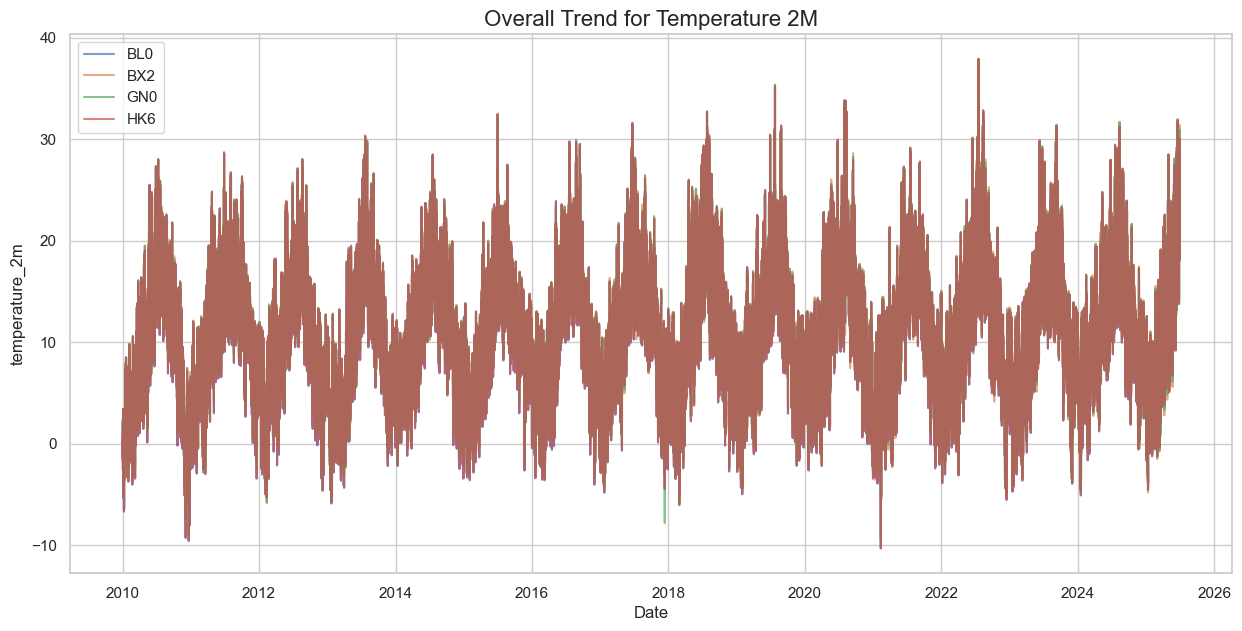

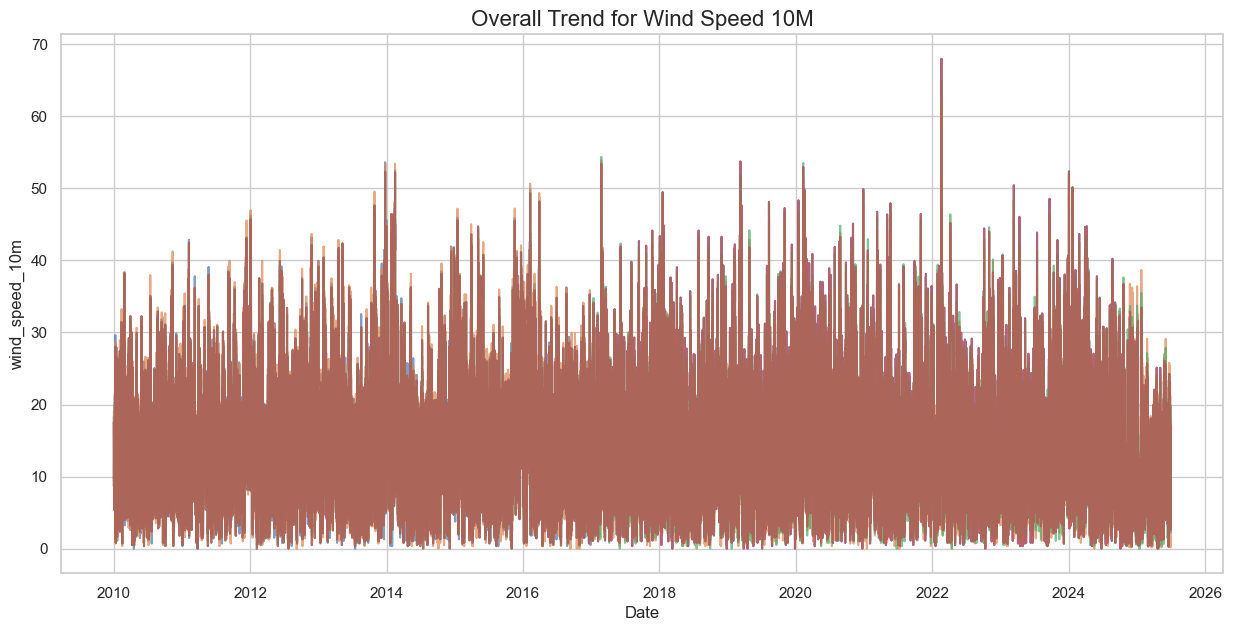

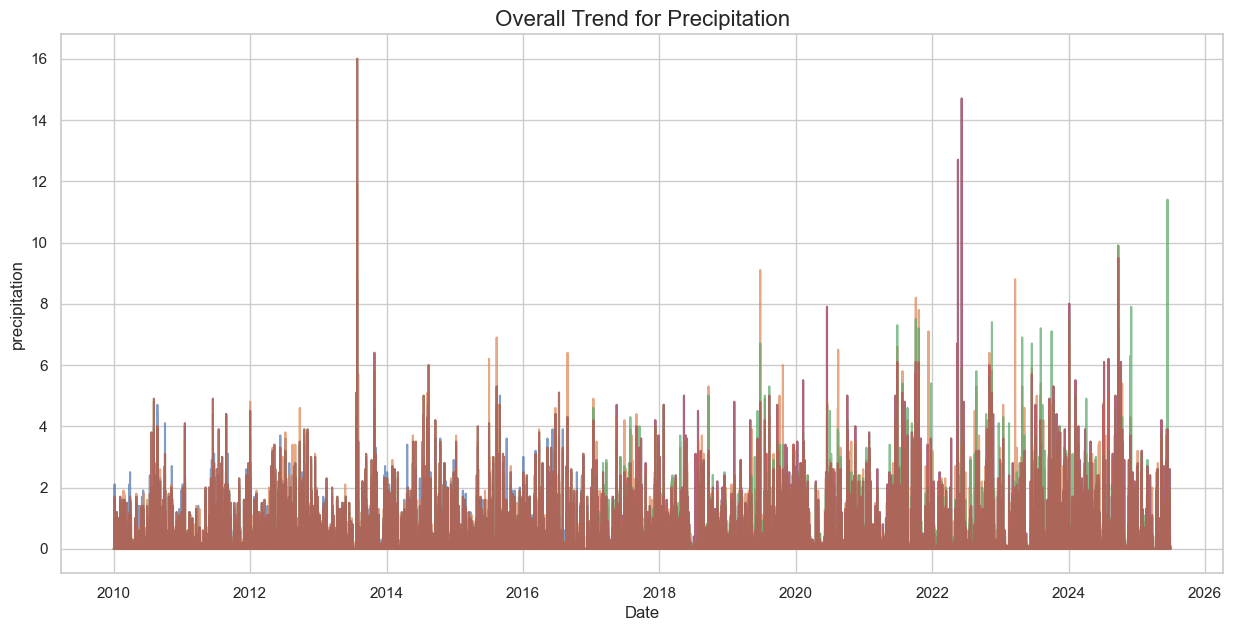

In [8]:
# select key variables for plotting
weather_vars = {
    'temperature_2m': 'teal',
    'wind_speed_10m': 'mediumslateblue',
    'precipitation': 'coral'
}

# get a unique list of site codes
sites = df['site_code'].unique()

for var, color in weather_vars.items():
    plt.figure()
    
    # plot each site as a line with some transparency
    for site in sites:
        site_df = df[df['site_code'] == site]
        plt.plot(site_df.index, site_df[var], label=site, alpha=0.7)
    
    plt.title(f'Overall Trend for {var.replace("_", " ").title()}', fontsize=16)
    plt.ylabel(var)
    plt.xlabel('Date')
    
    # only show the legend for the first plot to avoid clutter
    if var == 'temperature_2m':
        plt.legend()
        
    plt.show()

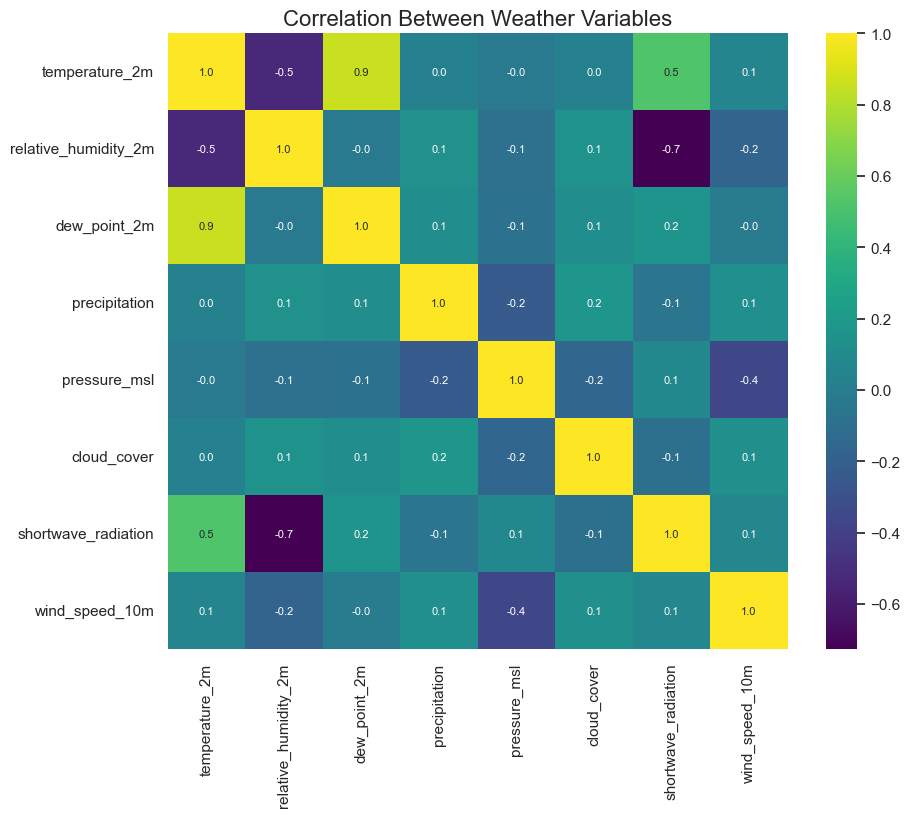

C:\Users\clown\AppData\Local\Temp\ipykernel_10484\1967844382.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='site_code', y='temperature_2m', palette='coolwarm')


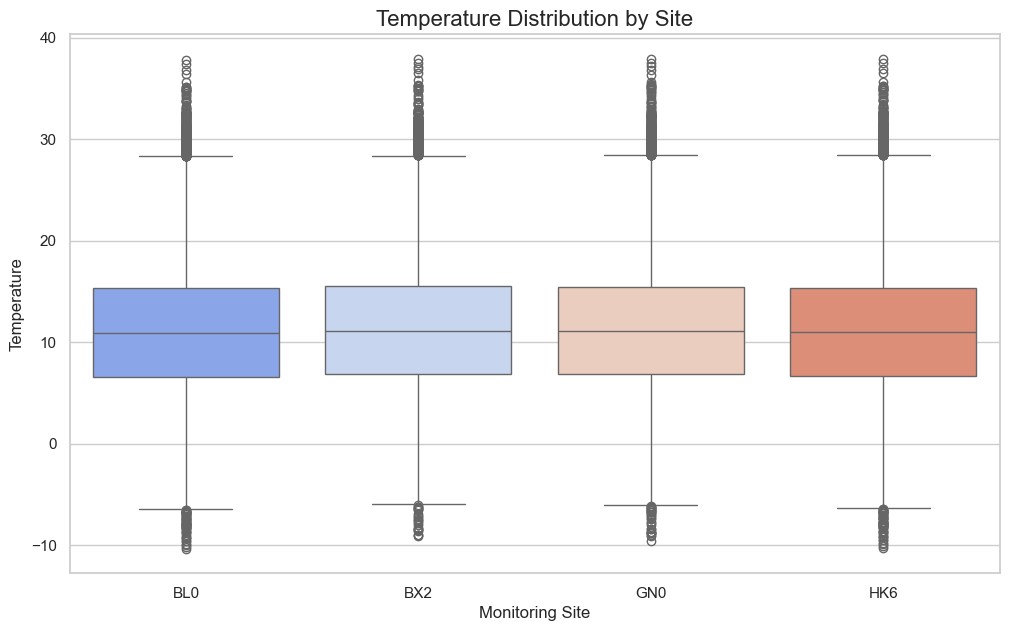

In [12]:
# correlation heatmap
# columns for the heatmap
corr_cols = [
    'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 
    'precipitation', 'pressure_msl', 'cloud_cover', 
    'shortwave_radiation', 'wind_speed_10m'
]
correlation_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.1f', annot_kws={"size": 8})
plt.title('Correlation Between Weather Variables', fontsize=16)
plt.show()


# distribution plot (temperature)
# this helps us compare the typical temperature at each site
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='site_code', y='temperature_2m', palette='coolwarm')
plt.title('Temperature Distribution by Site', fontsize=16)
plt.xlabel('Monitoring Site')
plt.ylabel('Temperature')
plt.show()

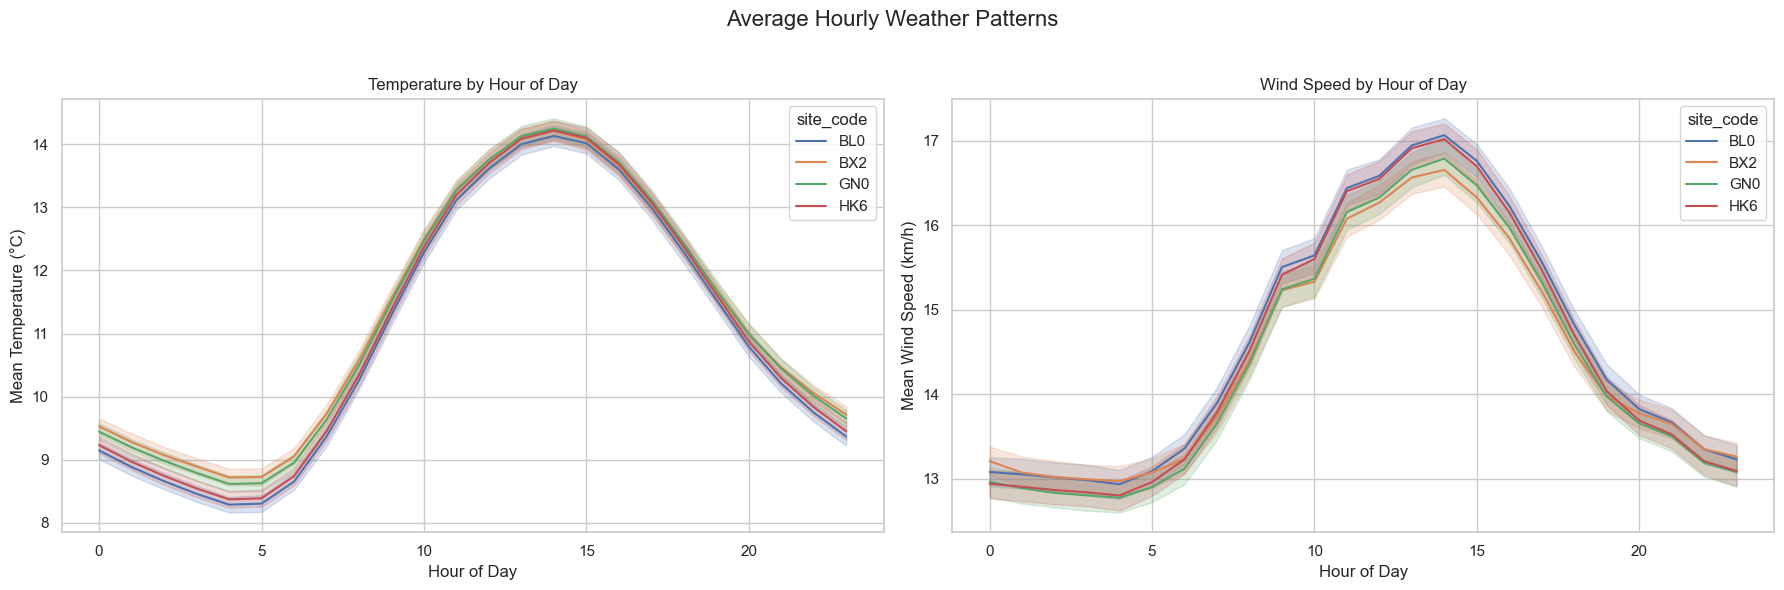

In [15]:
df_patterns = df.copy()
df_patterns['hour'] = df_patterns.index.hour

# create a 1x2 subplot for temperature and wind speed
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Average Hourly Weather Patterns', fontsize=16)

# plot hourly temperature
sns.lineplot(ax=axes[0], data=df_patterns, x='hour', y='temperature_2m', hue='site_code')
axes[0].set_title('Temperature by Hour of Day')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Mean Temperature (°C)')

# plot hourly wind speed
sns.lineplot(ax=axes[1], data=df_patterns, x='hour', y='wind_speed_10m', hue='site_code')
axes[1].set_title('Wind Speed by Hour of Day')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Mean Wind Speed (km/h)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

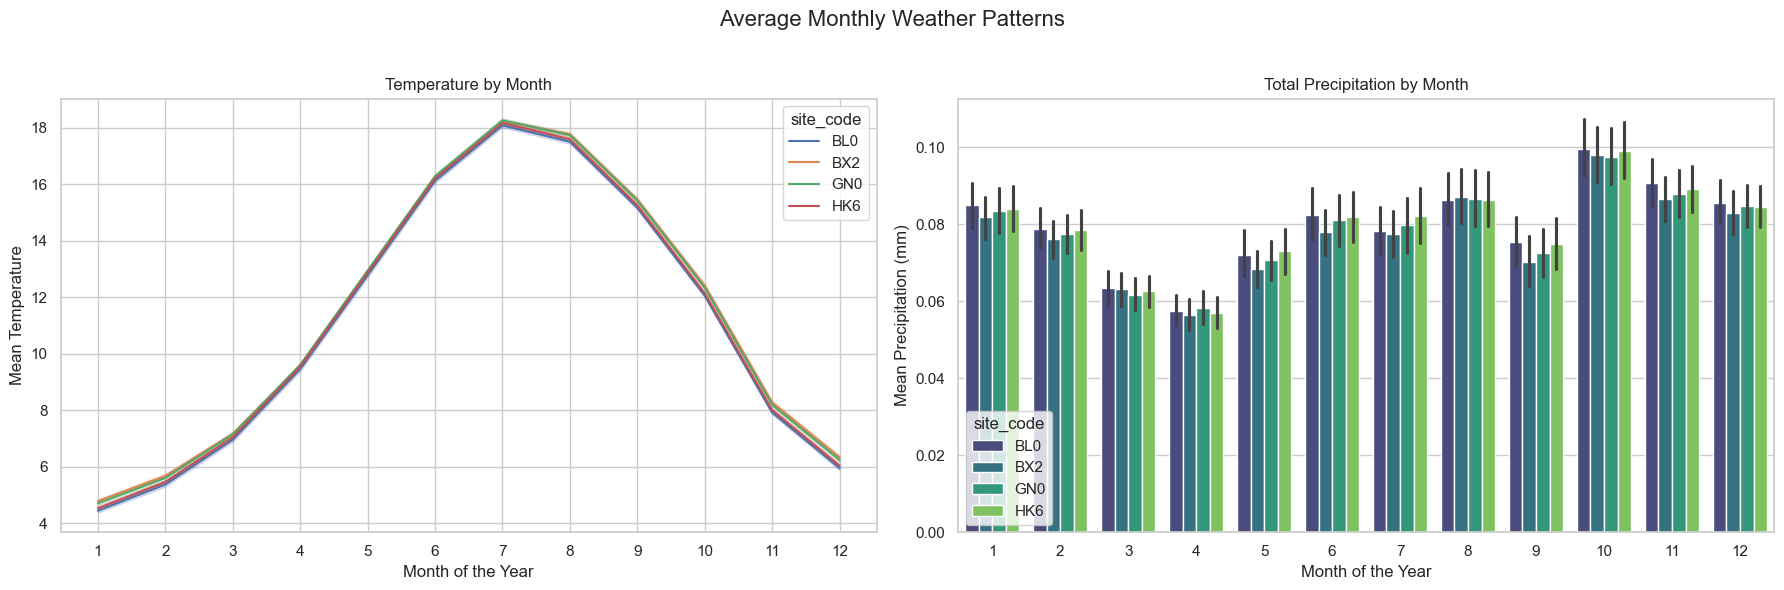

In [19]:
df_patterns['month'] = df_patterns.index.month

# create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Average Monthly Weather Patterns', fontsize=16)

# plot monthly temperature
sns.lineplot(ax=axes[0], data=df_patterns, x='month', y='temperature_2m', hue='site_code')
axes[0].set_title('Temperature by Month')
axes[0].set_xlabel('Month of the Year')
axes[0].set_ylabel('Mean Temperature')
axes[0].set_xticks(range(1, 13))

# plot monthly precipitation
sns.barplot(ax=axes[1], data=df_patterns, x='month', y='precipitation', hue='site_code', palette='viridis')
axes[1].set_title('Total Precipitation by Month')
axes[1].set_xlabel('Month of the Year')
axes[1].set_ylabel('Mean Precipitation (mm)')
axes[1].set_xticks(range(0, 12))
axes[1].set_xticklabels(range(1, 13))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()